# Module 5 Lab - Visualization

## Neranjan Ramakrishnan Sugumar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from completejourney_py import get_data

*Importing data*


In [3]:
cj_data = get_data()
demographics = cj_data['demographics']
coupon_redemptions = cj_data['coupon_redemptions']

*Inner Join Coupon Redemptions and Demographics*

In [4]:
coupon_with_demographics = (
    demographics.
    merge(coupon_redemptions, on='household_id', how='inner')
)

### Pie Chart - Coupon Redemption by Age Group

In [5]:
grouped_cluster_pie = (
    coupon_with_demographics
    .groupby(['age'], as_index=False)
        .agg({'coupon_upc':'count'})
)
grouped_cluster_pie = (
    grouped_cluster_pie.
    rename(columns={'coupon_upc': 'coupons'})
)

<Axes: title={'center': 'Coupon Redemptions by Age Group'}, ylabel='coupons'>

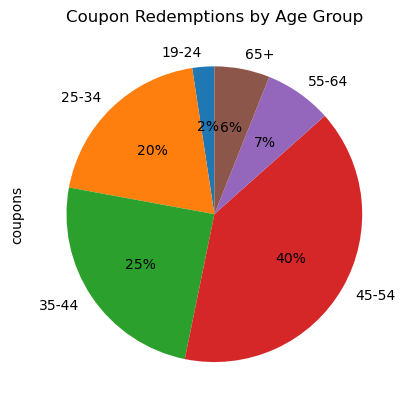

In [6]:
(
  grouped_cluster_pie
    .plot.pie(y='coupons', 
              labels=grouped_cluster_pie['age'], 
              autopct='%1.0f%%', 
              startangle=90, 
              legend=False,
              title='Coupon Redemptions by Age Group'
             )  
)

### Bar Chart - Coupon Redemption vs Marital Status

In [7]:
grouped_cluster_bar = (
    coupon_with_demographics
    .groupby(['marital_status'], as_index=False)
        .agg({'coupon_upc':'count'})
)
grouped_cluster_bar = (
    grouped_cluster_bar.
    rename(columns={'coupon_upc': 'coupons'})
)
grouped_cluster_bar

,marital_status,coupons
0,Married,842
1,Unmarried,570


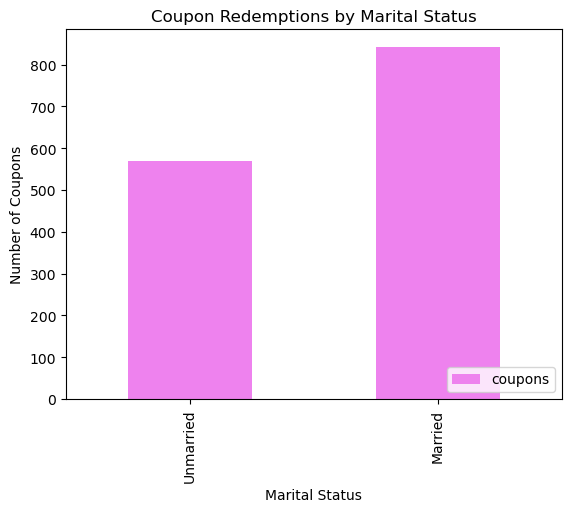

In [8]:
(
    grouped_cluster_bar
    .sort_values('coupons')
    .plot.bar(x = 'marital_status', 
              xlabel='Marital Status',              
              y = ['coupons'], 
              ylabel='Number of Coupons',
              title = 'Coupon Redemptions by Marital Status', 
              color = 'violet')
    .legend(loc='lower right')
);

### Line Chart - Coupon Redemtion vs Marital Status over Months

In [9]:
coupon_with_demographics['redemption_month'] = coupon_with_demographics['redemption_date'].dt.month
grouped_cluster_line = (
    coupon_with_demographics
    .groupby(['redemption_month'], as_index=False)
        .agg({'coupon_upc':'count'})
)

In [10]:
grouped_cluster_line_married = (
    coupon_with_demographics
    .query("marital_status == 'Married'")
    .groupby(['redemption_month'], as_index=False)
        .agg({'coupon_upc':'count'})
)

grouped_cluster_line_unmarried = (
    coupon_with_demographics
    .query("marital_status == 'Unmarried'")
    .groupby(['redemption_month'], as_index=False)
        .agg({'coupon_upc':'count'})
)

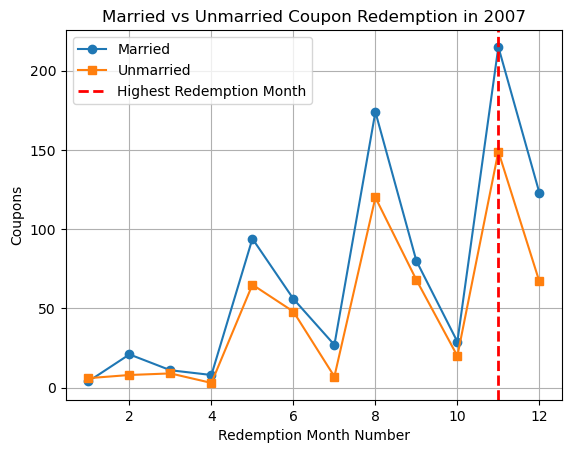

In [24]:
(
    plt.
    plot(grouped_cluster_line_married['redemption_month'], 
         grouped_cluster_line_married['coupon_upc'], 
         label='Married', 
         marker='o')
)
(
    plt.
    plot(grouped_cluster_line_unmarried['redemption_month'], 
         grouped_cluster_line_unmarried['coupon_upc'], 
         label='Unmarried', 
         marker='s')    
)


plt.axvline(x=11, color='red', linestyle='--', linewidth=2, label='Highest Redemption Month')

plt.title('Married vs Unmarried Coupon Redemption in 2007')
plt.xlabel('Redemption Month Number')
plt.ylabel('Coupons')
plt.legend()
plt.grid(True)

plt.show()